
 #  Numpy Arrays and Loops

## PETE 2061 Lab 3

<a id='top'></a>

<a id='overview'></a>
# Topics Covered
<font color=blue>
 * [Numpy Overview](#numpy) 
 * [Numpy arange() function](#arange)
 * [Array Initialization in Numpy](#array_initialization)  
 * [Plotting](#plot) 
 * [Universal Functions](#ufunc)
 * [Aggregation Functions](#aggregation)
 * [Broadcasting rules](#broadcasting) 
 * [Slicing](#slicing)
 * [Multidimensional Arrays](#multidim)   
 * [Control Structures](#control)</font>
<br>

<a id='numpy'></a>
## Numpy Overview
- NumPy (Numeric Python) is the fundamental package for scientific computing in Python.
- It is a Python library that provides a multidimensional array object, that can store arrays of multiple dimensions.
- The NumPy package provides basic routines for manipulating large arrays and matrices of numeric data.
- It has several functions for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation, etc.
 

In [6]:
import numpy as np           # an alias for the numpy package
aList = [1.0,2,3]
bList = [4,5,6]
aArray = np.array(aList)     # the np.array() function converts the list [1,2,3] into a numpy array.
bArray = np.array(bList)
print(aArray)
print(bArray)

[1. 2. 3.]
[4 5 6]


In [13]:
print(aArray + bArray)   # the + operator is overloaded to perform element-wise addition on arrays
print(aArray * bArray)   # the * operator is overloaded to perform element-wise multiplication on arrays
print(aArray ** bArray)  # the ** operator raises each element in aArray to the power of the corresponding element in bArray

#Note that this behavior is different from what the + operator does on lists eg.
print(aList + bList)     # the + operator is overloaded to concatenate lists

[5 7 9]
[ 4 10 18]
[  1  32 729]
[1, 2, 3, 4, 5, 6]


Assigning elements in a Numpy array

In [14]:
aArray[0]=11    # overrides what was in aArray[0] with 11
print(aArray)
aArray.fill(3)  # sets all the values in the aArray to 3
print(aArray)

[11  2  3]
[3 3 3]


In [3]:
#another way to set all the values in the aArray to a constant value
aArray[:] = 0 # we need to use [:], ortherwise aArray will get assigned to just an integer value of 0
print(aArray)
print(aArray.dtype)    #aArray.dtype returns the type of the elements stored in aArray (which is a 64-bit integer)
print(type(aArray))    #type(aArray) returns the type of the aArray variable

#testing what happens if we do not use [:]
aArray = 2
print(aArray)
aArray = np.array([1,2,3])  #re-create the aArray by passing list [1,2,3] into the np.array() function
print(type(aArray))

[0 0 0]
int64
<class 'numpy.ndarray'>
2
<class 'numpy.ndarray'>


* All elements of a numpy array have to be of the same data type. 
* "aArray" is of type integer as seen in the cell above.
* Assigning a floating point number to any of its elements will round the number down to its nearest integer (floor).

In [4]:
aArray[0] = 3.99  # decimal parts are truncated, be careful!
print(aArray)
aArray.fill(-3.7)      # fill() will have the same behavior. The array remains an integer array
print(aArray)

[3 2 3]
[-3 -3 -3]


In the cell below, I show three ways to create a floating-point array:

In [23]:
#1. By specifying one or more of the entries of the array to be a float during the creating of the array
aArray = np.array([11,12,13.00])
print(aArray)

#1. By passing "dtype=float" as a second argument of the np.array() function
aArray = np.array([11,12,13],dtype=float)
print(aArray)

#3. By calling the astype() Numpy function when the np.Array() is used to create the array
aArray = np.array([11,12,13]).astype(float)
print(aArray)

#Note that all three approaches can be used to create arrays of other numerical data types like integers or complex numbers
#try this

aArray = aArray.astype(int)  #astype() works even if the array has already been created 
print(aArray)

[11. 12. 13.]
[11. 12. 13.]
[11. 12. 13.]
[11 12 13]


<a id='arange'></a>
## Numpy arange() function. 
* The format for the arange() function is arange(start, stop, increment)
* like the range() function, if you specify only two arguments, it will be for the start and stop; increment will be 1
* like the range() function, if you specify only one argument, it will be for the stop; start will be 0 and increment will be 1

In [12]:
a = np.arange(0,6,1)    #This will create a numpy array that starts at zero and ends at 5.  
b = range(0,6,1)
print(type(a))
print(type(b))
#test the idea of specifying only two (and only one) argument(s) here


<class 'numpy.ndarray'>
<class 'range'>


You can get the shape of an array using the numpy shape() function

In [13]:
# shape returns a tuple listing the length of the array
print(a.shape)
print(np.shape(a))   #These two statements are equivalent

(6,)
(6,)


In [16]:
print(a.size) # or np.size(a), return the total number of elements
# return the number of dimensions of the array
print(a.ndim)

6
1


In [17]:
#You can also create floating point arrays using arange
a = np.arange(1.5,2.4,0.3)
print(a)

[1.5 1.8 2.1]


<a id='array_initialization'></a>
## Important ways to initialize arrays
* using np.arange()
* using np.ones()
* using np.zeros()
* using np.eye()
* using np.empty(), followed by fill() or array[:] = constant


In [29]:
a = np.ones((2,3)) # need to supply tuple as shape of the array!
print(a)   # You can pass in dtype=int as second argument to create corresponding integer array

[[1. 1. 1.]
 [1. 1. 1.]]


In [30]:
a = np.zeros((3,3),dtype=int) # need to supply tuple as shape of the array!
print(a)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [31]:
a = np.identity(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
a = np.eye(4,dtype=int)  
print(a)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [33]:
a = np.empty(2)
print(a)
a.fill(5.0)
print(a)
a[:] = 4.0
print(a)

[7.74860419e-304 7.74860419e-304]
[5. 5.]
[4. 4.]


In [22]:
#To return evenly spaced numbers over a specified interval, use: 
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
a = np.linspace(0,1,5)
print(a)

#To return numbers spaced evenly on a log scale.
#numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
#In linear space, the sequence starts at base start (base to the power of start) and ends with base stop (see endpoint below).

logInterval = np.logspace(0,1,5)
print(logInterval)


[0.   0.25 0.5  0.75 1.  ]
[ 1.          1.77827941  3.16227766  5.62341325 10.        ]


<a id='plot'></a>
## Quick and Gentle Introduction to Plotting with Matplotlib

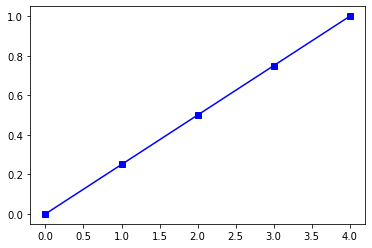

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib inline is useful in Jupyter notebook but should be commented out in Python editors (eg. Spyder)
plt.plot(a,'b-s')   # The 3 characters in 'b-s' stand for "blue", "solid line", and "square marker", respectively
plt.show()

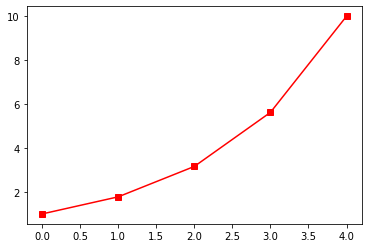

In [24]:
plt.plot(logInterval,'r-s')
plt.show()

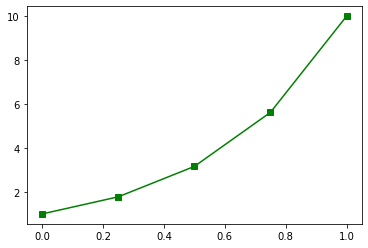

In [25]:
plt.plot(a,logInterval,'g-s')
plt.show()

<a id='ufunc'></a>
## Universal Functions (ufunc) in Numpy
* A ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs. They include
    * Arithmetic Operators: `+, -, *, /, //, %, **`
    * Comparison Operators: `<, >, <=, >=, ==, !=`
    * Bitwise Operators: `&, |, ~, ^, >>, <<`
    * Trigonometric Functions: `np.sin, np.cos, np.tan, etc`
    * Exponential Functions: `np.exp, np.log, np.log10, etc`

In [26]:
xVec = np.linspace(0,np.pi)
print(xVec)
xVec *= 2    #this is element wise multiplication of original xVec by 2
#print(xVec)

[0.         0.06411414 0.12822827 0.19234241 0.25645654 0.32057068
 0.38468481 0.44879895 0.51291309 0.57702722 0.64114136 0.70525549
 0.76936963 0.83348377 0.8975979  0.96171204 1.02582617 1.08994031
 1.15405444 1.21816858 1.28228272 1.34639685 1.41051099 1.47462512
 1.53873926 1.60285339 1.66696753 1.73108167 1.7951958  1.85930994
 1.92342407 1.98753821 2.05165235 2.11576648 2.17988062 2.24399475
 2.30810889 2.37222302 2.43633716 2.5004513  2.56456543 2.62867957
 2.6927937  2.75690784 2.82102197 2.88513611 2.94925025 3.01336438
 3.07747852 3.14159265]


[ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -3.15108218e-01
 -4.33883739e-01 -5.45534901e-01 -6.48228395e-01 -7.40277997e-01
 -8.20172255e-01 -8.86599306e-01 -9.38468422e-01 -9.74927912e-01
 -9.95379113e-01 -9.99486216e-01 -9.87181783e-01 -9.58667853e-01
 -9.14412623e-01 -8.55142763e-01 -7.81831482e-01 -6.95682551e-01
 -5.98110530e-01 -4.90717552e-01 -3.75267005e-01 -2.53654584e-01
 -1.27877162e-01 -2.44929360e-16]


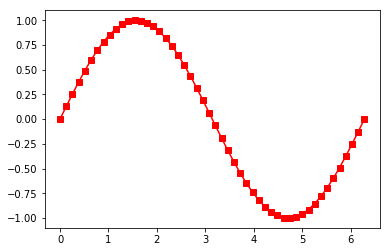

In [42]:
yVec = np.sin(xVec)
print(yVec)
import matplotlib.pyplot as plt
plt.plot(xVec,yVec,'r-s')
plt.show()

<a id='aggregation'></a>
## Aggregation Functions in Numpy
- Aggregations are functions which summarize the values in an array (e.g. min, max, sum, mean, etc.)
- Numpy aggregations are much faster than Python built-in functions
- They all have the same call style:

    `np.min() np.max() np.sum() np.prod()`<br>
`np.all() np.median() np.percentile()`   
`np.mean() np.std() np.var() np.any()`<br>
`np.argsort()`<br>
`np.argmin() np.argmax() . . .`<br>
`np.nanmin() np.nanmax() np.nansum(). . .`<br>

<!--
<img src="figure/np_aggregation.png", style="float: left;", width="300">
-->

![myphoto](https://github.com/lsuhpchelp/lbrnloniworkshop2019/raw/master/day2_python/figure/np_aggregation.png)

In [38]:
a=np.arange(6).reshape(-1,3)   # "Pythonic" expressions. They call functions sequentially from left to right
# np.arange(6) first creates a vector [0,1,2,3,4,5], then reshape (2,-1) will reshape this vector to have 
# 2 rows and whatever number of columns will be needed based on the number of elements in the array
print(a)

[[0 1 2]
 [3 4 5]]


In [34]:
print(a.size) #returns the total number of elements
print(a.ndim) #returns the number of dimensions of the array. Is it 1D, 2D or 3D?

6
2


In [35]:
print(a.sum())   # adds up all values and returns one aggregate value. Equivalent to print(np.sum(a))
# note this is not numpy’s sum! and it doesn't aggregate into one value
print(sum(a))

15
[3 5 7]


In [37]:
print(np.sum(a))  #adds up all values and returns one aggregate value. Equivalent to print(a.sum()) 
print(np.sum(a,axis=0))   #as shown in figure above, it adds downwards. It will give you a row!
print(np.sum(a,axis=1))   #as shown in figure above, it adds sideways. It will give you a column!

15
[3 5 7]
[ 3 12]


In [39]:
# Numpy Statistical Methods
np.set_printoptions(precision=4)
# generate 2x3 random float array
a=np.random.random(6).reshape(2,3)  #np.random.random() will generate 6 random numbers between 0 and 1.
print(a)

[[0.4754 0.698  0.6256]
 [0.2621 0.6452 0.6211]]


In [40]:
print(a.mean(axis=0))  # It will give a row. So, it will find the mean of each column.
print(a.mean(axis=1))  # It will give a column. So, it will find the mean of each row.
print(a.mean())        # finds the mean of all the numbers in the 2x3 array. Will return only one number.

[0.3687 0.6716 0.6233]
[0.5997 0.5094]
0.55456436044267


In [ ]:
# You can also perform weighted averaging by specifying "weights" as a second argument
print(np.average(a,weights=[1,2,3],axis=1))  # It will give a column

In [ ]:
print(a.std(axis=0))          # standard deviation
print(np.std(a, axis=0))      # standard deviation
print(np.var(a, axis=1))      # variance
print(a.var(axis=1))          # variance

In [ ]:
print(a.min())
print(np.max(a))
print(a.argmin(axis=0))    # find index of the minimum
print(a.argmax(axis=1))
print(np.argmin(a))

<a id='broadcasting'></a>
### Broadcasting Rules
- If array shapes differ, left-pad the smaller shape with 1s
- If any dimension does not match, broadcast the dimension with size=1

<!--
<img src="figure/np_broadcast.png", align="left", width="500"></br>
-->

![myphoto](https://github.com/lsuhpchelp/lbrnloniworkshop2019/raw/master/day2_python/figure/np_broadcast_scale.png)

- If neither non-matching dimension is 1, raise an error.

<!--
<img src="figure/np_broadcast_error.png", align="left", width="200">
-->

![myphoto](https://github.com/lsuhpchelp/lbrnloniworkshop2019/raw/master/day2_python/figure/np_broadcast_error.png)

In [ ]:
a = np.arange(3)
print("a = ", a)
b = 5
print("b = ", b)
print("a + b = ",a + b)

In [ ]:
a = np.arange(3).reshape(-1,1)
print("a =")
print(a)
b = 5
print("b =", b)
print("a + b =")
print(a+b)

In [ ]:
a = np.ones((3,3))
print("a=")
print(a)
b = np.arange(3)
print("b=")
print(b)
print("a+b=")
print(a+b)

In [ ]:
a = np.ones((3,3))
print("a=")
print(a)
b = np.arange(3).reshape(-1,1)
print("b=")
print(b)
print("a+b=")
print(a+b)

<a id='slicing'></a>
## Slicing Numpy Arrays

- `arr[lower:upper:step]` or `arr[start:stop:increment]`
- Extracts a portion of a sequence by specifying a lower and upper bound. The lower-bound element is included, but the upper-bound element is not included. Mathematically: `[lower, upper)`. The step value specifies the stride between elements

In [ ]:
a = np.array([10,11,12,13,14])
print(a[1:3])    # start at the second element and end at index (3-1)
print(a[1:-2])   # start at the second element and end at 3rd to the last element
print(a[:])      # entire array
print(a[::2])    # from 1st element, print every other element (even indices)
#the indexing ideas we learned under lists apply here too

### Slices are references
- Slices are references to memory in the original array
- Changing values in a slice also changes the original array!

In [41]:
a = np.arange(5)
print(a)
b = a[2:4]  # b is NOT a new location in memory, it points to a region in memory where these elements of a are stored
print(b) 
b[0]=7  # changing what is stored in b changes the corresponding element in a, because b only points to a region in a
print(a)

[0 1 2 3 4]
[2 3]
[0 1 7 3 4]


<a id='multidim'></a>
## Multi-dimensional Arrays

In [7]:
# A few 2D operations similar to the 1D operations shown above
a = np.array([[ 0, 1, 2, 3],[10,11,12,13]], float)
print(a)
print(f"a.shape = {a.shape}, a.size = {a.size}, a.ndim = {a.ndim}")

[[ 0.  1.  2.  3.]
 [10. 11. 12. 13.]]
a.shape = (2, 4), a.size = 8, a.ndim = 2


In [ ]:
print(a[1,3]) # print the element on 2nd row, 4th column. This is how we reference a 2D array element
a[1,3] = -1   # sets the value of the indexed element to -1

In [ ]:
a = np.arange(1,26)
a = a.reshape(5,5)   # reshape vector of 1 to 25, into a 2D array of dimension 5x5
print(a)

In [ ]:
print(a[0,3:4])
print(a[3:,3:])

<a id='control'></a>
## Control Structures 
<font color=blue>
* if-else
* for loops, while loops
* break: jump out of the current loop
* continue: jump to the top of next cycle within the loop
* pass: do nothing 
</font> 
[top](#top)

In [49]:
for num in range(4):     # This will loop for every num in the data structure range(4). "num" can be any variable.
    print(num)           # NOTE: Indentation signifies code blocks
print(num+1)

0
1
2
3
4


In [47]:
index=0
while (index < 4):        #this will loop until the condition (index < 3) becomes false.
    print(index)
    index += 1
print(index)

0
1
2
3


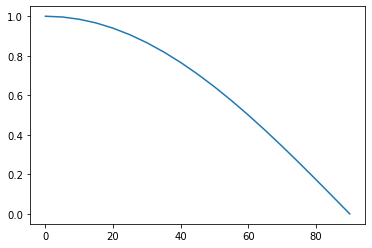

In [50]:
#Modify this code to plot the cosine function between 0 and 360 degrees
deg2radians = np.pi/180
angleVec = np.arange(0,91,5)
cosAngle = np.zeros(angleVec.shape)  #uses the shape of angleVec to initialize cosAngle    
indx = 0
#for angle in range(0,91,5): 
for angle in angleVec:   
    cosAngle[indx] = np.cos(angle*deg2radians)
    indx += 1
    
plt.plot(angleVec,cosAngle)
plt.show()

In [52]:
# iterate list elements with a for loop
animals = ['dog','cat','horse']
for name in animals:
    print(name)

dog
cat
horse


In [53]:
for index, name in enumerate(animals):   # this will give both the indices and items stored in animals
    print(index+1, name)  # note the addition of 1 to index. Observe that index is not modified in the print statement.

1 dog
2 cat
3 horse


In [54]:
my_dict = {'cats': 4, 'dogs':2, 'sheep':3}
print(my_dict)

{'cats': 4, 'dogs': 2, 'sheep': 3}


In [ ]:
for key, value in my_dict.items():
    print(key, value)